Outcome
0    500
1    268
Name: count, dtype: int64


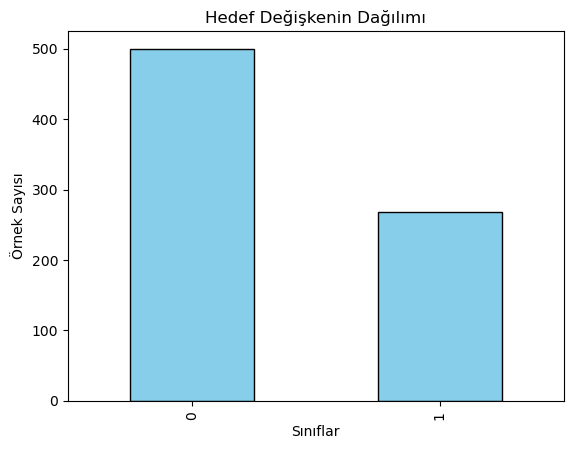

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

# Veri setini yükleyin (örneğin CSV dosyasından)  Outcome
df = pd.read_csv('diabetes.csv')

# Hedef değişkenin (target) dağılımını kontrol et
class_distribution = df['Outcome'].value_counts()

# Dağılımı yazdır
print(class_distribution)

# Dağılımı grafikle göster
class_distribution.plot(kind='bar', color='skyblue', edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('Hedef Değişkenin Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')

# Grafiği göster
plt.show()

     DENGESİZ VERİ SETİ OLUŞTURMA

Outcome
0    500
1    100
Name: count, dtype: int64


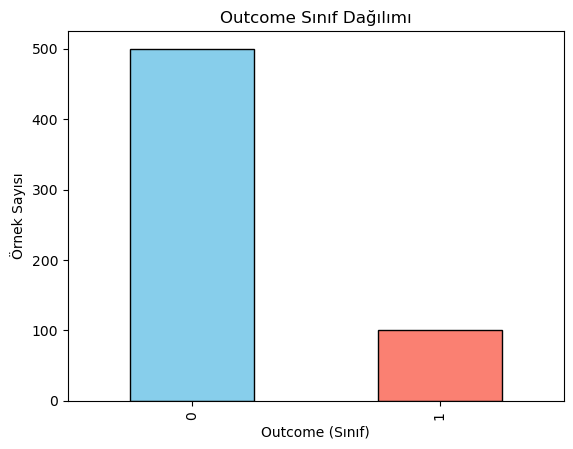

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Veri setini yükleyin
df = pd.read_csv('diabetes.csv')

# Azınlık sınıfı (target == 1) ve baskın sınıfı (target == 0) ayıralım
minority_class = df[df['Outcome'] == 1]
majority_class = df[df['Outcome'] == 0]

# Azınlık sınıfını (1) 25 örneğe indirgemek
minority_undersampled = resample(minority_class,
                                 replace=False,  # Aynı örnekleri çoğaltma
                                 n_samples=100,  # 1 sınıfının örnek sayısını 25'e indirmek
                                 random_state=42)

# Azınlık sınıfı (1) ve baskın sınıfı (0) birleştirelim
df_undersampled = pd.concat([majority_class, minority_undersampled])

# Yeni sınıf dağılımını kontrol edelim
print(df_undersampled['Outcome'].value_counts())

# Sınıf dağılımını görselleştirelim
class_distribution = df_undersampled['Outcome'].value_counts()

# Bar grafiği oluşturma
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('Outcome Sınıf Dağılımı')
plt.xlabel('Outcome (Sınıf)')
plt.ylabel('Örnek Sayısı')

# Grafiği göster
plt.show()

# Yeni veri setini bir CSV dosyasına kaydedelim
df_undersampled.to_csv('diabetes_undersampled.csv', index=False)


    DENGESİZ VERİ SETİ ÜZERİNDE MAKİNE ÖĞRENMESİ

Confusion Matrix:
[[142   5]
 [ 26   7]]

Classification Report:
{'0': {'precision': 0.8452380952380952, 'recall': 0.9659863945578231, 'f1-score': 0.9015873015873016, 'support': 147.0}, '1': {'precision': 0.5833333333333334, 'recall': 0.21212121212121213, 'f1-score': 0.3111111111111111, 'support': 33.0}, 'accuracy': 0.8277777777777777, 'macro avg': {'precision': 0.7142857142857143, 'recall': 0.5890538033395176, 'f1-score': 0.6063492063492064, 'support': 180.0}, 'weighted avg': {'precision': 0.7972222222222223, 'recall': 0.8277777777777777, 'f1-score': 0.7933333333333334, 'support': 180.0}}

Accuracy Score: 0.8277777777777777


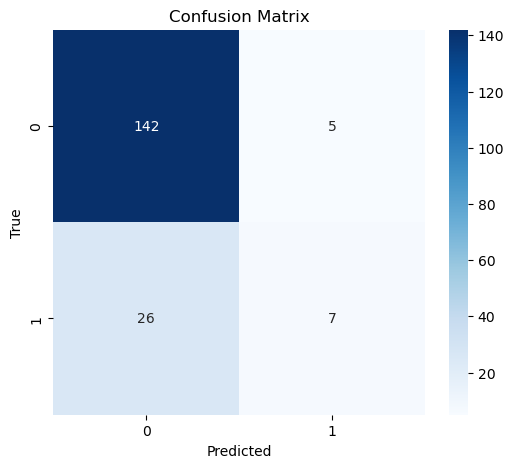

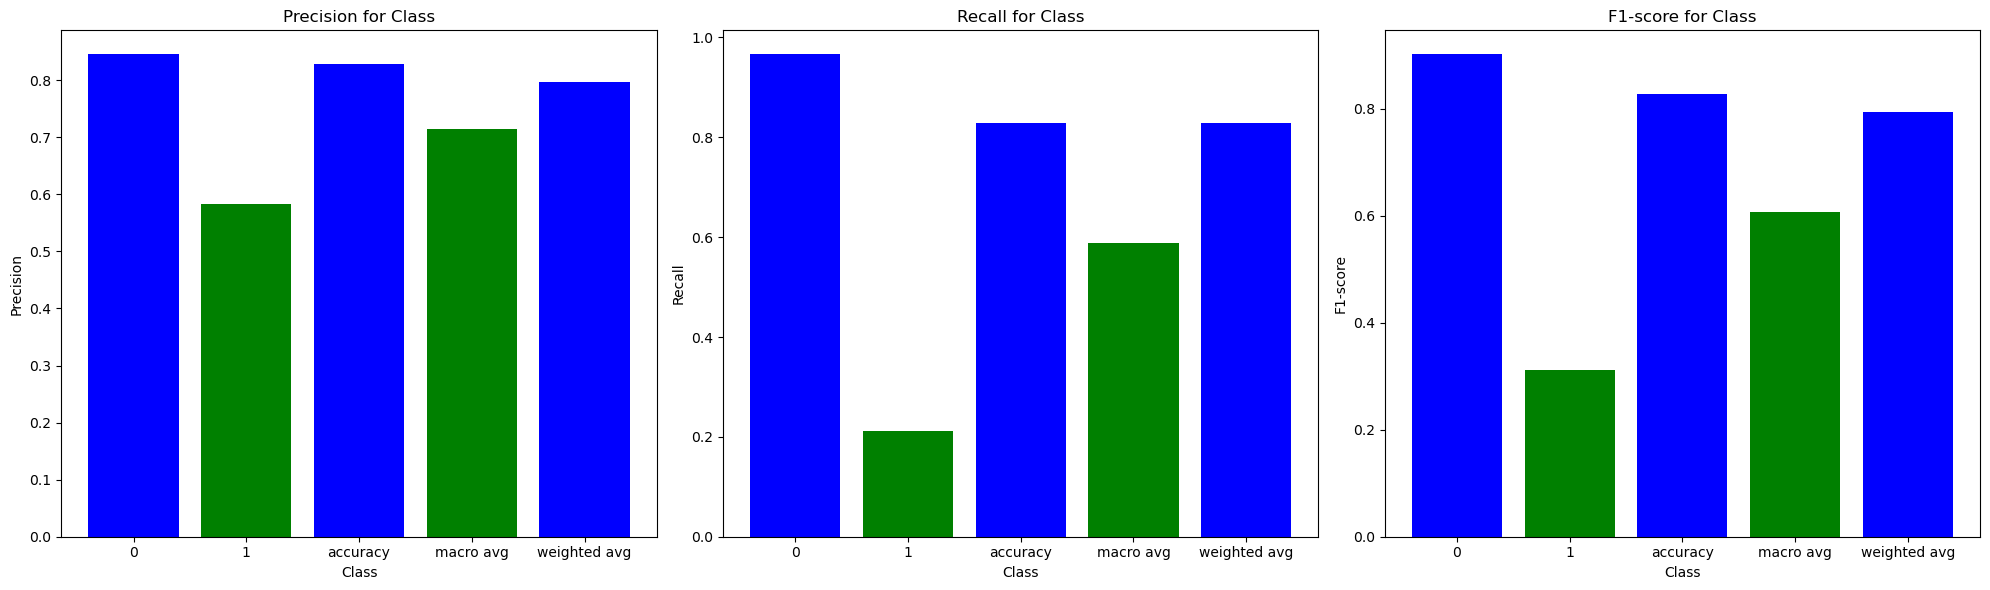

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Veri setini yükleyin (örneğin CSV dosyasından)
df = pd.read_csv('diabetes_undersampled.csv')

# Özellikler ve hedef değişkeni ayıralım
X = df.drop('Outcome', axis=1)  # Özellikler
y = df['Outcome']  # Hedef değişken

# Eğitim ve test setlerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest modelini seçelim
model = RandomForestClassifier(random_state=42)

# Modeli eğitelim
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred = model.predict(X_test)

# Modelin başarısını değerlendirelim
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nClassification Report:")
report = classification_report(y_test, y_pred, output_dict=True)
print(report)

# Accuracy'yi manuel olarak hesaplayalım
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy}")

# Precision, Recall ve F1-Score'u daha iyi göstermek için bir DataFrame oluştur
report_df = pd.DataFrame(report).transpose()

# Görselleştirme: Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Precision, Recall, F1-Score her sınıf için görselleştirme
# 0 ve 1 sınıflarını ayrı ayrı görselleştirelim
metrics = ['precision', 'recall', 'f1-score']

plt.figure(figsize=(20, 6))

# 0 ve 1 sınıfları için her bir metrik
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)  # 1 satır, 3 sütun, her metriği ayrı bir subplot'ta çizeceğiz
    plt.bar(report_df.index, report_df[metric], color=['blue', 'green'])
    plt.title(f'{metric.capitalize()} for Class')
    plt.xlabel('Class')
    plt.ylabel(metric.capitalize())

plt.tight_layout()
plt.show()



                 Dengesiz Veri setini dengeli hale getirme

Outcome
0    350
1    350
Name: count, dtype: int64


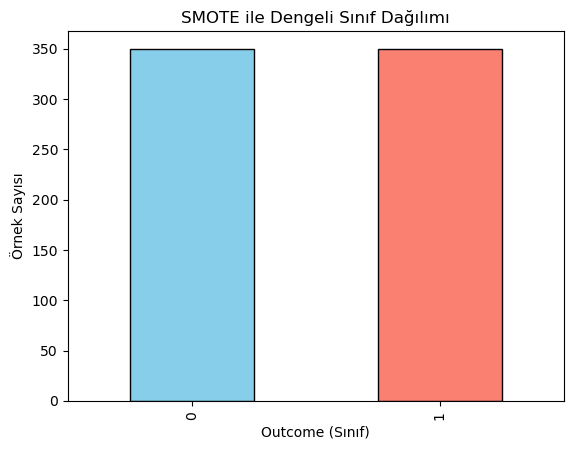

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Veri setini yükleyin
df = pd.read_csv('diabetes_undersampled.csv')

# Özellikler ve hedef değişkeni ayıralım
X = df.drop('Outcome', axis=1)  # Özellikler
y = df['Outcome']              # Hedef değişken

# Eğitim ve test veri setlerini ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SMOTE ile azınlık sınıfını çoğaltma
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Yeni sınıf dağılımını kontrol edelim
print(y_resampled.value_counts())

# Sınıf dağılımını görselleştirelim
class_distribution = y_resampled.value_counts()
class_distribution.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Grafik başlığı ve etiketler
plt.title('SMOTE ile Dengeli Sınıf Dağılımı')
plt.xlabel('Outcome (Sınıf)')
plt.ylabel('Örnek Sayısı')

# Grafiği göster
plt.show()

# Dengeli veri setini birleştirip CSV'ye kaydedelim
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), y_resampled.reset_index(drop=True)], axis=1)
df_resampled.to_csv('diabetes_balanced.csv', index=False)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Model oluşturma ve eğitme
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

# Test veri setiyle tahmin yapma
y_pred = model.predict(X_test)

# Performansı değerlendirme
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[133  17]
 [ 16  14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       150
           1       0.45      0.47      0.46        30

    accuracy                           0.82       180
   macro avg       0.67      0.68      0.67       180
weighted avg       0.82      0.82      0.82       180

